# Reading , understading and visulaization of data

In [173]:
#importing all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [129]:
# read the data set
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
# get the total number of rows and columns
bike.shape

(730, 16)

In [131]:
# check for the null count and the data types for all the colunms
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [132]:
# from the above info , there is no missing values and no null values present

In [133]:
# get overall statstical info
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [134]:
# Dropping the unnecessary variables 
# 1. instant - as it is kind of index , dropping it
# 2. dteday - it is just the date and the derived info from this is already captured like yr,mnth,holiday,weekday and workingday
# 3. casual - it is covered in total count
# 4. registered -  it is covered in total count
bike = bike.drop(['instant', 'dteday', 'casual', 'registered' ], axis =1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [135]:
# after the data visualisation ,
# 1. Continous variables - temp, atemp, hum, windspeed, cnt
# 2. Categorical variables - season, yr, mnth, holiday, weekday, workingday, weathersit

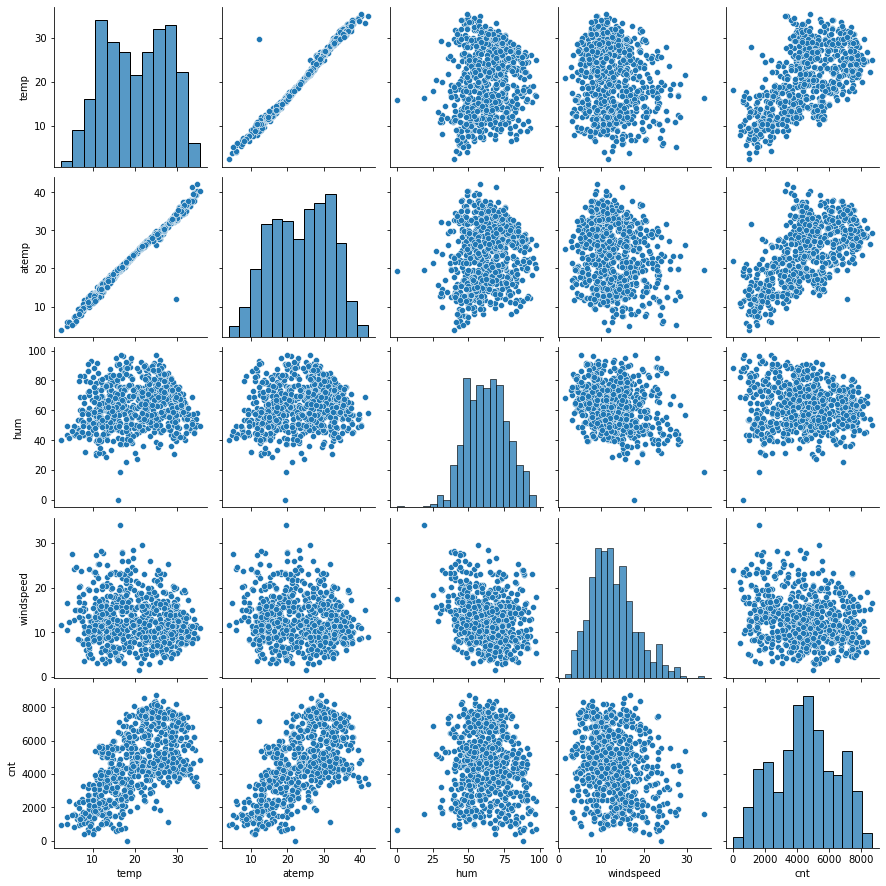

In [136]:
# visualising numeric variables
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

'temp' and 'atemp' have a positive correlation with each other , need to check the for multicollinearity.

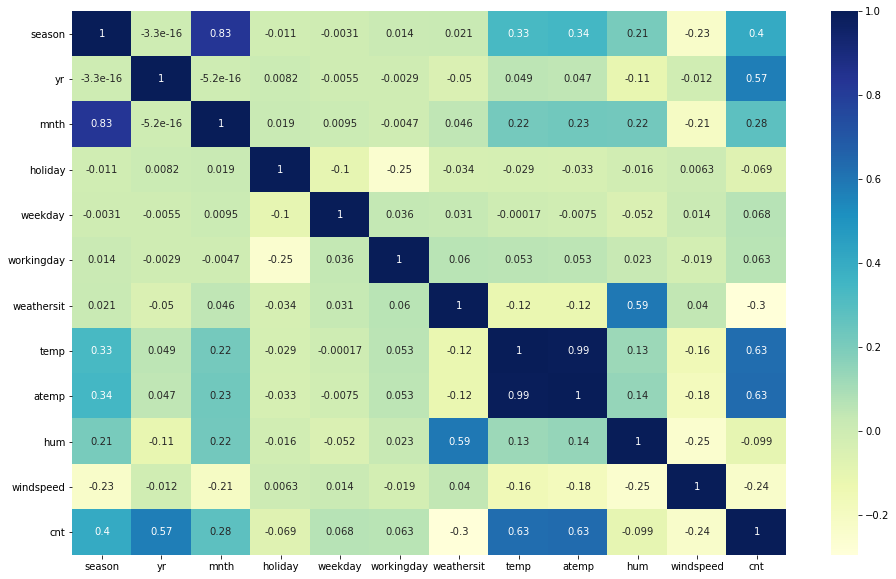

In [137]:
# heatmap
plt.figure(figsize=(16,10))
sns.heatmap(bike.corr(), annot= True , cmap ='YlGnBu')
plt.show()

temp and atemp having corelation 0.99 which is very high and need to drop one of them to avoid multicollinearity.
As Dataset characteristics , temp : temperature in Celsius and atemp: feeling temperature in Celsius.
So the feeling temperature is usefull compare to temperature because it is important how the customer feels the temperature
So dropping 'temp'.

In [138]:
# Dropping temp as it is highly correlated with atemp
bike = bike.drop('temp', axis =1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


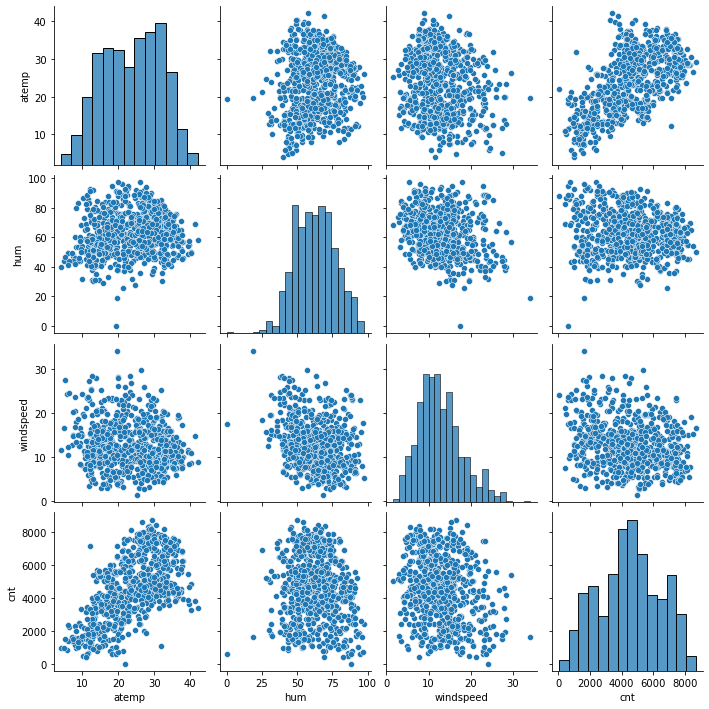

In [139]:
sns.pairplot(bike[['atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

In [140]:
# Converting necessary numerical variables to categorical variables
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:'Clear',2:'Misty or Cloudy',3:'Light Snow',4:'Heavy Rain'}, inplace=True)
bike['weekday'].replace({6:"Sunday",0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday"},inplace=True)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

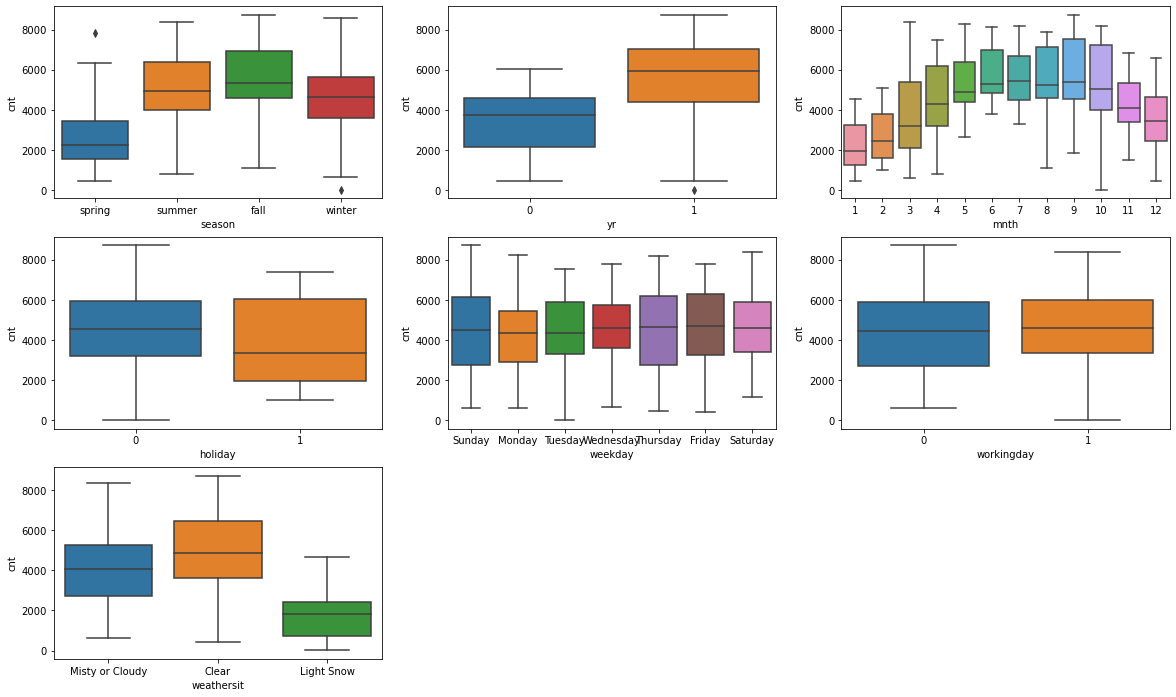

In [141]:
# visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)

# Preparing the data for modelling 

Creating dummy variables for categorical data for season,month,weekday and weathersit.

holiday and workingday are already having only 0 and 1.

In [142]:
season = pd.get_dummies(bike['season'],drop_first=True)
weather = pd.get_dummies(bike['weathersit'],drop_first=True)
day = pd.get_dummies(bike['weekday'],drop_first=True)
month = pd.get_dummies(bike['mnth'],drop_first=True)

In [143]:
print(season)
print(weather)
print(day)
print(month)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]
     Light Snow  Misty or Cloudy
0             0                1
1             0                1
2             0                0
3             0                0
4             0                0
..          ...              ...
725           0                1
726           0                1
727           0                1
728           0                0
729           0                1

[730 rows x 2 columns]
     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0         0         0       1         0        0          0
1         1         0       0         0        0          0
2         0         0       0         0 

In [144]:
# concatinate dummy variables to original dataset
bike = pd.concat([bike, season, weather, day, month ], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Sunday,0,Misty or Cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Monday,0,Misty or Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Tuesday,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Wednesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Thursday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# Dropping the 'season' , 'weathersit' , 'weekday' and 'mnth'
bike.drop(['season', 'weathersit', 'weekday','mnth'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model creation

In [146]:
df_train , df_test = train_test_split(bike , train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [147]:
print(df_train.head())
print(df_test.head())

     yr  holiday  workingday    atemp      hum  windspeed   cnt  spring  \
576   1        0           1  33.1448  70.4167  11.083475  7216       0   
426   1        0           0  20.6746  62.1250  10.792293  4066       1   
728   1        0           0  11.5850  48.3333  23.500518  1796       1   
482   1        0           0  18.8752  48.9583   8.708325  4220       0   
111   0        0           1  16.0977  72.9583  14.707907  1683       0   

     summer  winter  ...  3  4  5  6  7  8  9  10  11  12  
576       0       0  ...  0  0  0  0  1  0  0   0   0   0  
426       0       0  ...  1  0  0  0  0  0  0   0   0   0  
728       0       0  ...  0  0  0  0  0  0  0   0   0   1  
482       1       0  ...  0  1  0  0  0  0  0   0   0   0  
111       1       0  ...  0  1  0  0  0  0  0   0   0   0  

[5 rows x 29 columns]
     yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
184   0        1           0  33.27085  63.7917   5.459106  6043       0   
535   1       

# Rescaling variable with MinMaxScaling

Rescaling variable can be done in 2 ways
1. Min - max scaling (normalisation) between 0 and 1 --> ( x - xmin)/(xmax - xmin)
2. Standardisation (mean=0 and sigma=1) --> (x - mean)/ sigma

In [148]:
#MinMaxScaler()

# Create onject
scaler = MinMaxScaler()

#Create list of numeric vaiable 
num_var = [ 'atemp', 'hum', 'windspeed', 'cnt']

# fit data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

<ipython-input-148-54af8f621a7b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_var] = scaler.fit_transform(df_train[num_var])
C:\Users\6111608\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Training the Model

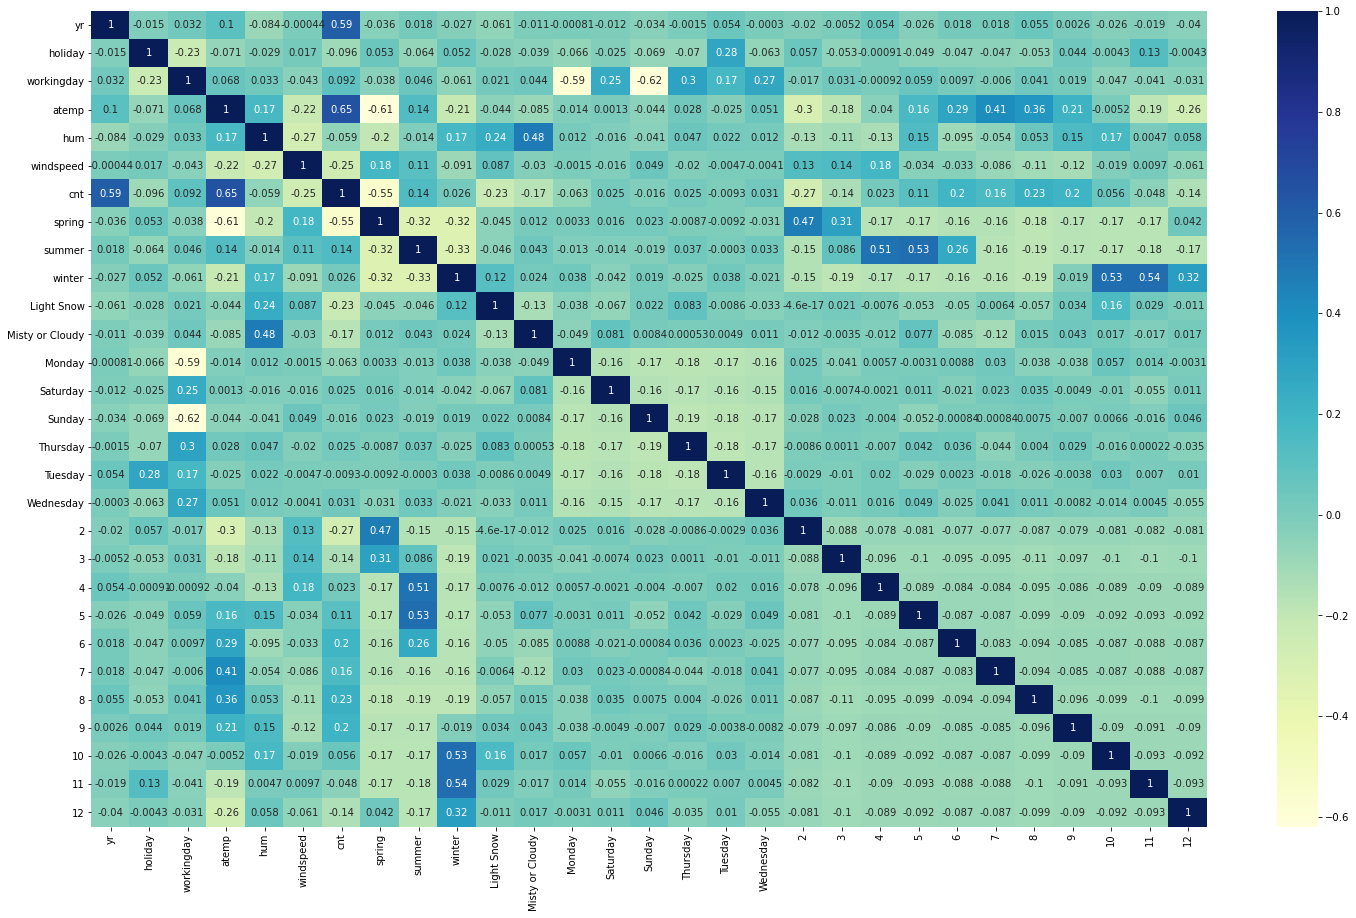

In [149]:
# check the correlation using heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(), annot= True , cmap ='YlGnBu')
plt.show()

In [150]:
#Create  X_train , y_train --> X_train = all col except cnt and y_train = cnt
y_train = df_train.pop('cnt')
X_train = df_train

In [151]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow,...,3,4,5,6,7,8,9,10,11,12
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [152]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   atemp            510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   spring           510 non-null    uint8  
 7   summer           510 non-null    uint8  
 8   winter           510 non-null    uint8  
 9   Light Snow       510 non-null    uint8  
 10  Misty or Cloudy  510 non-null    uint8  
 11  Monday           510 non-null    uint8  
 12  Saturday         510 non-null    uint8  
 13  Sunday           510 non-null    uint8  
 14  Thursday         510 non-null    uint8  
 15  Tuesday          510 non-null    uint8  
 16  Wednesday        510 non-null    uint8  
 17  2             

In [154]:
#Selecting the feature using RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [155]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Misty or Cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 14),
 ('Sunday', False, 3),
 ('Thursday', False, 15),
 ('Tuesday', False, 12),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 9),
 (12, False, 10)]

In [156]:
col = X_train.columns[rfe.support_]
col

Index([             'yr',           'atemp',             'hum',
             'windspeed',          'spring',          'winter',
            'Light Snow', 'Misty or Cloudy',                 3,
                       4,                 5,                 6,
                       8,                 9],
      dtype='object')

In [157]:
X_train_rfe = X_train[col]

In [158]:
# build model with all varible

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

#Build model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const              0.298904
yr                 0.232468
atemp              0.457506
hum               -0.161244
windspeed         -0.162652
spring            -0.078947
winter             0.099176
Light Snow        -0.230879
Misty or Cloudy   -0.053666
3                  0.061781
4                  0.058523
5                  0.093845
6                  0.064870
8                  0.062797
9                  0.115602
dtype: float64

In [159]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          1.95e-184
Time:                        19:46:24   Log-Likelihood:                 501.01
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2989      0.034      8.809      0.000       0.232       0.366
yr                  0.2325      0.008     28.046      0.000       0.216       0.249
atemp               0.4575      0.034     13.566      0.000       0.391       0.524
hum                -0.1612      0.039     -4.149      0.000      -0.238      -0.085
windspeed          -0.1627      0.026     -6.159      0.000      -0.215      -0.111
spring             -0.0789      0.019     -4.195      0.000      -0.116      -0.042
winter              0.0992      0.016      6.038      0.000       0.067       0.131
Light Snow         -0.2309      0.027     -8.567      0.000      -0.284      -0.178
Misty or Cloudy    -0.0537      0.011     -5.020      0.000      -0.075      -0.033
3                   0.0618      0.015      4.038      0.000       0.032       0.092
4                   0.0585      0.020      2.890      0.004       0.019       0.098
5                   0.0938      0.019      4.944      0.000       0.057       0.131
6                   0.0649      0.019      3.350      0.001       0.027       0.103
8                   0.0628      0.018      3.439      0.001       0.027       0.099
9                   0.1156      0.018      6.549      0.000       0.081       0.150
==============================================================================
Omnibus:                       72.649   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.352
Skew:                          -0.680   Prob(JB):                     2.10e-46
Kurtosis:                       5.837   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  p value should be less than 0.05 and from above info , all the p-values are accepatable.


In [161]:
# VIF = 1 / 1- R2  calculation
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values , i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
0,const,69.43
5,spring,3.93
2,atemp,3.09
6,winter,3.03
3,hum,1.93
10,4,1.79
13,8,1.75
11,5,1.68
12,6,1.60
8,Misty or Cloudy,1.56


In [162]:
# Apart from const all the VIF values are below 5 and all are accepted.

# Residual analysis

In [163]:
y_train_pre = lr_model.predict(X_train_sm)
y_train_pre

576    0.721927
426    0.516616
728    0.355921
482    0.603446
111    0.266428
         ...   
578    0.831284
53     0.231627
350    0.283264
79     0.296886
520    0.650510
Length: 510, dtype: float64

C:\Users\6111608\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

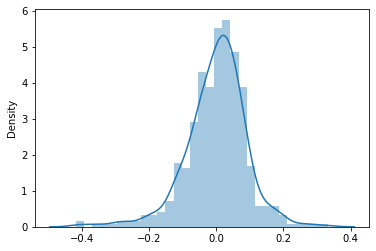

In [164]:
residual = y_train - y_train_pre
sns.distplot(residual)

### from the above graph , distrubution is centred around 0 and is normal 

# Predictions and evaluation on test set

In [165]:
# Rescaling the test set  with MinMaxScaler()

#Create list of numeric vaiable 
num_var = [ 'atemp', 'hum', 'windspeed', 'cnt']

# fit data
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

<ipython-input-165-f592dc2eae89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_var] = scaler.transform(df_test[num_var])
C:\Users\6111608\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [166]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
y_test = df_test.pop('cnt')
X_test = df_test

In [169]:
# add constat to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
# Remove the variables 
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light Snow,Misty or Cloudy,3,4,5,6,8,9
184,1.0,0,0.769660,0.657364,0.084219,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0.842587,0.610133,0.153728,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0.496145,0.837699,0.334206,0,1,0,1,0,0,0,0,0,0
221,1.0,0,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0.741471,0.314298,0.537414,0,0,0,0,0,0,0,1,0,0


In [171]:
y_test_pre = lr_model.predict(X_test_sm)

In [172]:
y_test_pre

184    0.477668
535    0.858347
299    0.381970
221    0.599864
152    0.564912
         ...   
702    0.696735
127    0.540640
640    0.748835
72     0.317972
653    0.718123
Length: 220, dtype: float64

In [174]:
# Evaluation model by calculating r2

r2_sqr_test = r2_score(y_true=y_test, y_pred=y_test_pre)
r2_sqr_test

0.8211613840351378

In [175]:
r2_sqr_train = r2_score(y_true=y_train, y_pred=y_train_pre)
r2_sqr_train

0.8367026113743306

# Conclusion

1. Model has p-values within the accepatable range i.e., below 0.05.
2. Modle has VIF values within the acceptable range i.e., below 5.
3. Model satisfies all the assumptions for errors.
4. Model has the R- square value of 0.8211 for test data and 0.8367 for train data which tells model is well built. Because 82% of variance can be expalined by model.
5. Prob (F-statistic) which is eqaul to 0(1.95e-184) tells that overall variance is good.
6. Equation for total number of bike for rental with variable which influence this count can be represented as,
 
 cnt = 0.2989	+ yr * 0.2325 + atemp * 0.4575 + hum * (-0.1612)+ windspeed * (-0.1627)	+ spring * (-0.0789	)+ winter * 0.0992	+ Light Snow * (-0.2309)	+ Misty or Cloudy * (-0.0537)	+ 3 * 0.0618	+ 4 * 0.0585	+ 5 * 0.0938	+ 6 * 0.0649	+ 8 * 0.0628	+ 9 * 0.1156 